In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# load muon 
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import muon as mu

mu.set_options(display_style = "html", display_html_expand = 0b000);

# Load the data files
- For the gex file, use the QC'd .h5ad

In [2]:
# Change these file paths accordingly
file_path_adt = "../data/gex/121c_ADT_raw.h5ad"
file_path_gex = "../data/qc_data/121c_quality_control.h5ad"

# Load the files
adata_adt = sc.read_h5ad(file_path_adt)
adata_gex = sc.read_h5ad(file_path_gex)

mdata = mu.MuData({"adt": adata_adt, "gex": adata_gex})
mdata

adt:Cell_Type_Experimental,category,"T_gamma_delta,Monocyte_classical,T_CD8_memory,T_CD..."
adt:Sample_Tag,category,"SampleTag03_hs,SampleTag10_hs,Multiplet,SampleTag1..."
adt:Sample_Name,category,"SampleTag03_hs,SampleTag10_hs,Multiplet,SampleTag1..."
adt:SampleTag01_hs_Read_Count,int64,"128,13,13,6,10,30,11,11,30,5,29,0,23,55,36,5430,16..."
adt:SampleTag02_hs_Read_Count,int64,"27,103,42,1,38,7,36,1,3,15,149,7,25,121,45,61,419,..."
adt:SampleTag03_hs_Read_Count,int64,"7286,24,14,0,55,12,17,10,3,7,112,750,5136,27244,36..."
adt:SampleTag04_hs_Read_Count,int64,"39,60,12,44,24086,28,12456,8,7,18,86,5,37,383,60,1..."
adt:SampleTag05_hs_Read_Count,int64,"17,25,1206,4,46,27,1,173,2,2,7,2,4,42,188,9,23,0,1..."
adt:SampleTag06_hs_Read_Count,int64,"18,20,32,8,38,20,37,3,21,2,179,28,50,242,24948,24,..."
adt:SampleTag07_hs_Read_Count,int64,"17,42,17586,23,46,70,66,6260,6,6,26506,11,55,370,2..."
adt:SampleTag08_hs_Read_Count,int64,"130,241,25,20,130,21,38,5,9,10,33,6,19,89,9980,23,..."


#### Remove Cells that were Filtered out during RNA QC steps

In [3]:
mu.pp.intersect_obs(mdata)
mdata

adt:Cell_Type_Experimental,category,"T_gamma_delta,Monocyte_classical,T_CD4_memory,Mono..."
adt:Sample_Tag,category,"SampleTag03_hs,SampleTag10_hs,SampleTag12_hs,Sampl..."
adt:Sample_Name,category,"SampleTag03_hs,SampleTag10_hs,SampleTag12_hs,Sampl..."
adt:SampleTag01_hs_Read_Count,int64,"128,13,6,10,11,11,30,5,0,55,5430,16,0,8,11,70,21,5..."
adt:SampleTag02_hs_Read_Count,int64,"27,103,1,38,36,1,3,15,7,121,61,419,9,16,21,12,2,0,..."
adt:SampleTag03_hs_Read_Count,int64,"7286,24,0,55,17,10,3,7,750,27244,27,94,0,7,39,11,3..."
adt:SampleTag04_hs_Read_Count,int64,"39,60,44,24086,12456,8,7,18,5,383,14,79,0,34,111,3..."
adt:SampleTag05_hs_Read_Count,int64,"17,25,4,46,1,173,2,2,2,42,9,23,0,12,103,25,4,0,25,..."
adt:SampleTag06_hs_Read_Count,int64,"18,20,8,38,37,3,21,2,28,242,24,24696,10,16,67,51,1..."
adt:SampleTag07_hs_Read_Count,int64,"17,42,23,46,66,6260,6,6,11,370,32,58,327,27,113,49..."
adt:SampleTag08_hs_Read_Count,int64,"130,241,20,130,38,5,9,10,6,89,23,40,5,4272,93,25,6..."


# Perform Quality Control

In [4]:
sc.pp.calculate_qc_metrics(mdata["adt"], inplace=True, percent_top=None)

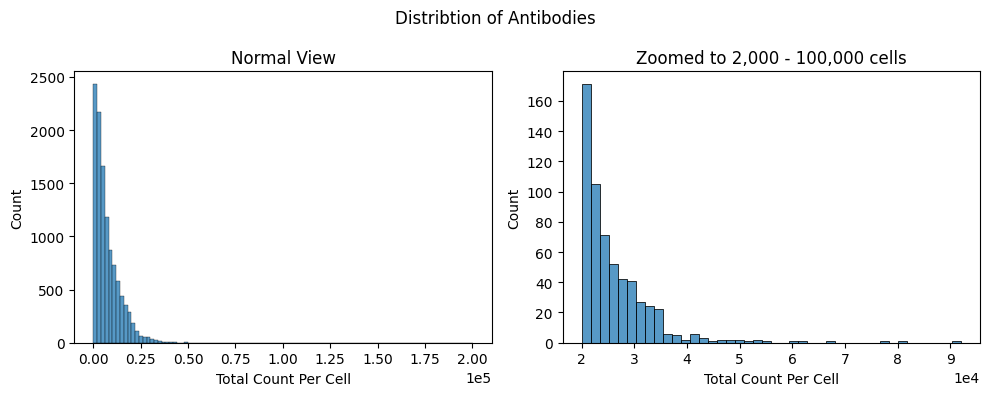

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

sns.histplot(mdata["adt"].obs.total_counts, ax=axs[0], bins=100)
sns.histplot(
    mdata["adt"].obs.query("total_counts>20000 and total_counts<100000")["total_counts"],
    ax=axs[1],
)

axs[0].set_title("Normal View")
axs[1].set_title("Zoomed to 2,000 - 100,000 cells");
for ax in axs:
    ax.set_xlabel("Total Count Per Cell")
    ax.ticklabel_format(style='sci',scilimits=(-2,4), axis='x')

fig.suptitle("Distribtion of Antibodies")
fig.tight_layout()

### Looking at Distribution Across Samples

A distribution of counts per cell across the samples to see if there are differences. As the total amount of reads and droplets can differ between the samples, a stringent, hard cutoff applied to all samples would not be appropriate.

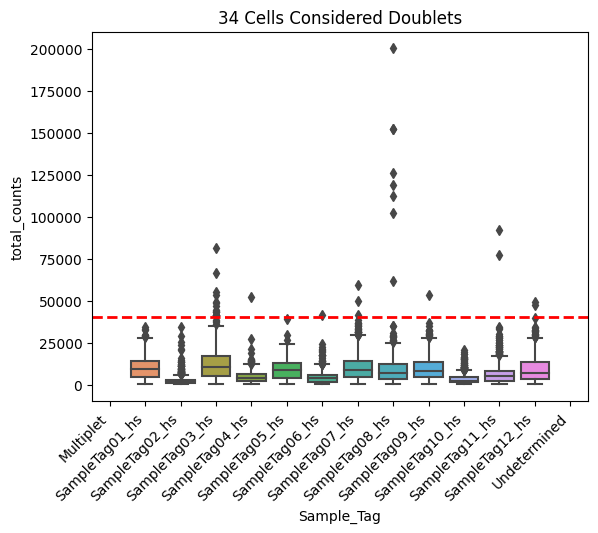

In [6]:
cell_cutoff = 40000
sns.boxplot(y=mdata["adt"].obs.total_counts, x=mdata["adt"].obs["Sample_Tag"])
plt.axhline(y=cell_cutoff, color="red", ls="--", lw=2)
plt.xticks(rotation=45, ha="right");
total_rm = (mdata["adt"].obs.total_counts > cell_cutoff).sum()
plt.title(f"{total_rm} Cells Considered Doublets");

In [7]:
sc.pp.filter_cells(mdata["adt"], max_counts=cell_cutoff)
mu.pp.intersect_obs(mdata)
mdata

adt:Cell_Type_Experimental,category,"T_gamma_delta,Monocyte_classical,T_CD4_memory,Mono..."
adt:Sample_Tag,category,"SampleTag03_hs,SampleTag10_hs,SampleTag12_hs,Sampl..."
adt:Sample_Name,category,"SampleTag03_hs,SampleTag10_hs,SampleTag12_hs,Sampl..."
adt:SampleTag01_hs_Read_Count,int64,"128,13,6,10,11,11,30,5,0,55,5430,16,0,8,11,70,21,5..."
adt:SampleTag02_hs_Read_Count,int64,"27,103,1,38,36,1,3,15,7,121,61,419,9,16,21,12,2,0,..."
adt:SampleTag03_hs_Read_Count,int64,"7286,24,0,55,17,10,3,7,750,27244,27,94,0,7,39,11,3..."
adt:SampleTag04_hs_Read_Count,int64,"39,60,44,24086,12456,8,7,18,5,383,14,79,0,34,111,3..."
adt:SampleTag05_hs_Read_Count,int64,"17,25,4,46,1,173,2,2,2,42,9,23,0,12,103,25,4,0,25,..."
adt:SampleTag06_hs_Read_Count,int64,"18,20,8,38,37,3,21,2,28,242,24,24696,10,16,67,51,1..."
adt:SampleTag07_hs_Read_Count,int64,"17,42,23,46,66,6260,6,6,11,370,32,58,327,27,113,49..."
adt:SampleTag08_hs_Read_Count,int64,"130,241,20,130,38,5,9,10,6,89,23,40,5,4272,93,25,6..."


# Save the filtered Data

In [8]:
file_path="../data/qc_data/121c_adt_gex_qc.h5mu"
mdata.write(file_path)

/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/anndata/_core/anndata.py:1294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c


### Removes tmp directory when done.

In [9]:
import shutil
shutil.rmtree("../data/tmp/")